# Name: Abisola Yetunde Raji 

# Student ID: 202308456

## 771762_B22_T3A: Big Data and Data Mining


# Question 1

* The age of the oldest driver/rider in the casualty table

In [1]:
# Import libraries needed
import sqlite3
import pandas as pd

#Create a connection object to the database file (accident_data_v1.0.0_2023.db)
#select the oldest age of the driver involved in the accident from the table
connection = sqlite3.connect('accident_data_v1.0.0_2023.db')
sql = "SELECT MAX(age_of_casualty) as 'Oldest Driver' FROM casualty WHERE casualty_class = 1"
oldest_driver_df = pd.read_sql_query(sql, connection)
# execute the query
oldest_driver_df

,Oldest Driver
0,101


# Question 2

* The total number of vehicle_type = 19 vehicles in the vehicle table

In [2]:
#counts the number of vehicles of type 19 involved in the accident
sql = "SELECT COUNT(vehicle_type) as 'Number of Vehicle Type 19' FROM vehicle WHERE vehicle_type = 19"
vehicle_count_df = pd.read_sql_query(sql, connection)
vehicle_count_df

,Number of Vehicle Type 19
0,47458


# Question 3
* The sex of driver, sex of casualty, speed limit and age of vehicle for accidents in all the lower layer super output area (LSOA) regions of Kingston Upon Hull. There is a need to do a JOIN on the lsoa table and some of the other tables. In the LSOA table, the codes are in the column lsoa01cd and the place names are in column lsoa01nm. The results will be in a pandas data frame.

In [3]:
#selects the sex of the driver, casualty, the speed limit of the road and the age of the vehicle involved 
sql = "SELECT v.sex_of_driver, c.sex_of_casualty, a.speed_limit, v.age_of_vehicle \
      FROM accident AS a \
    JOIN vehicle AS v ON a.accident_index = v.accident_index \
    JOIN casualty AS c ON a.accident_index = c.accident_index \
    JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd \
    WHERE l.lsoa01nm LIKE '%Kingston Upon Hull%'"
data_df = pd.read_sql_query(sql, connection)
data_df

,sex_of_driver,sex_of_casualty,speed_limit,age_of_vehicle
0,1,1,30,13
1,1,1,30,9
2,3,1,30,6
3,3,2,30,6
4,1,1,30,11
...,...,...,...,...
6382,1,1,30,-1
6383,1,1,30,-1
6384,1,1,30,-1
6385,3,1,30,-1


# Filter by 2020 Dataset

# Are there significant hours of the day, and days of the week, on which accidents occur?

In [4]:
#selects day_of_week and time from the accident
#counts the number of accidents for each day_of_week and time and sort in descending order. 
sql = "SELECT day_of_week, time, COUNT(*) as accident_count \
    FROM accident \
    WHERE accident_year = 2020 \
    GROUP BY day_of_week, time  \
    ORDER BY accident_count DESC; "
data_df_one = pd.read_sql_query(sql, connection)
data_df_one.head(20)

,day_of_week,time,accident_count
0,6,17:00,170
1,5,18:00,134
2,6,15:00,132
3,4,17:00,131
4,2,16:00,130
5,3,17:00,129
6,5,15:00,128
7,5,16:00,127
8,6,16:00,126
9,3,18:00,124


# Question 1 Visualization

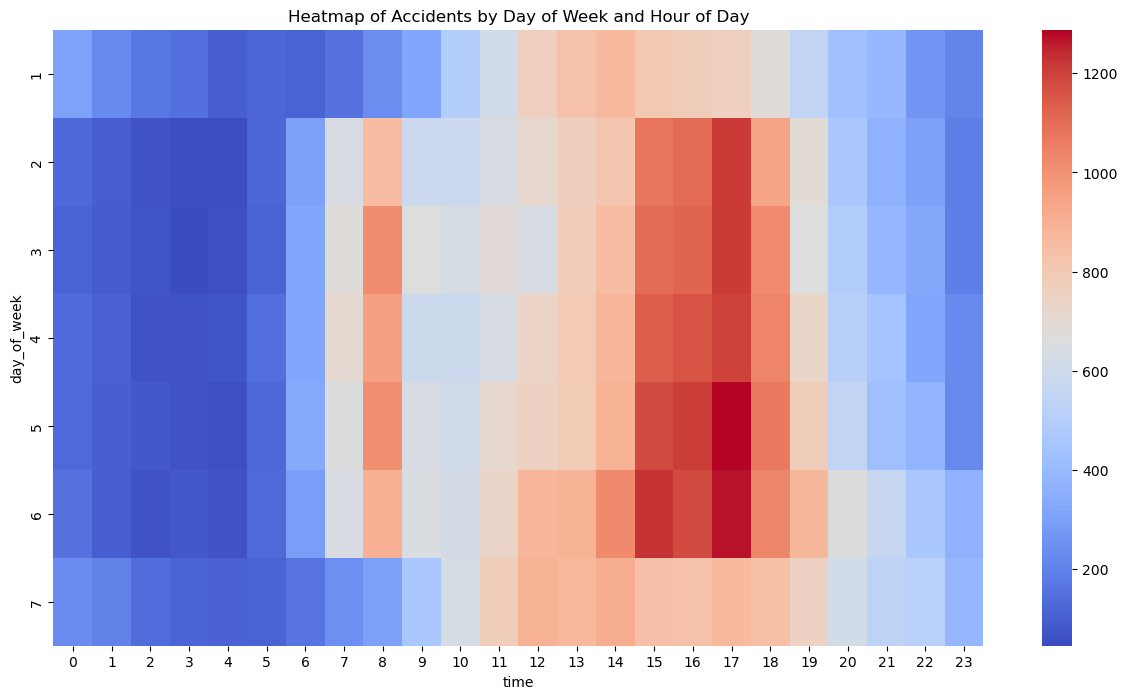

In [5]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# convert 'time' from a string to a time object and then to an hour of the day
data_df_one['time'] = pd.to_datetime(data_df_one['time']).dt.hour

# group by 'day_of_week' and 'time' and calculate the sum of 'accident_count' for each group
data_grouped = data_df_one.groupby(['day_of_week', 'time'])['accident_count'].sum().reset_index()

# import viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(data_grouped.pivot('day_of_week', 'time', 'accident_count'), cmap='coolwarm')
plt.title('Heatmap of Accidents by Day of Week and Hour of Day')
plt.show()

# For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

In [6]:
sql = "SELECT day_of_week, time, COUNT(*) as accident_count \
    FROM accident \
    JOIN vehicle ON accident.accident_index = vehicle.accident_index \
    WHERE \
    (vehicle.vehicle_type = 02 OR \
     vehicle.vehicle_type = 03 OR \
     vehicle.vehicle_type = 04 OR \
     vehicle.vehicle_type = 05) \
    GROUP BY day_of_week, time \
    ORDER BY accident_count DESC limit 50;"
data_df_two = pd.read_sql_query(sql, connection)
data_df_two.head(10)

,day_of_week,time,accident_count
0,5,18:00,123
1,4,17:30,122
2,5,17:00,122
3,5,17:30,120
4,6,17:30,114
5,3,17:30,112
6,6,17:00,112
7,4,18:00,111
8,2,17:30,110
9,5,18:30,107


# Question 2 Visualization

<Figure size 1500x800 with 0 Axes>

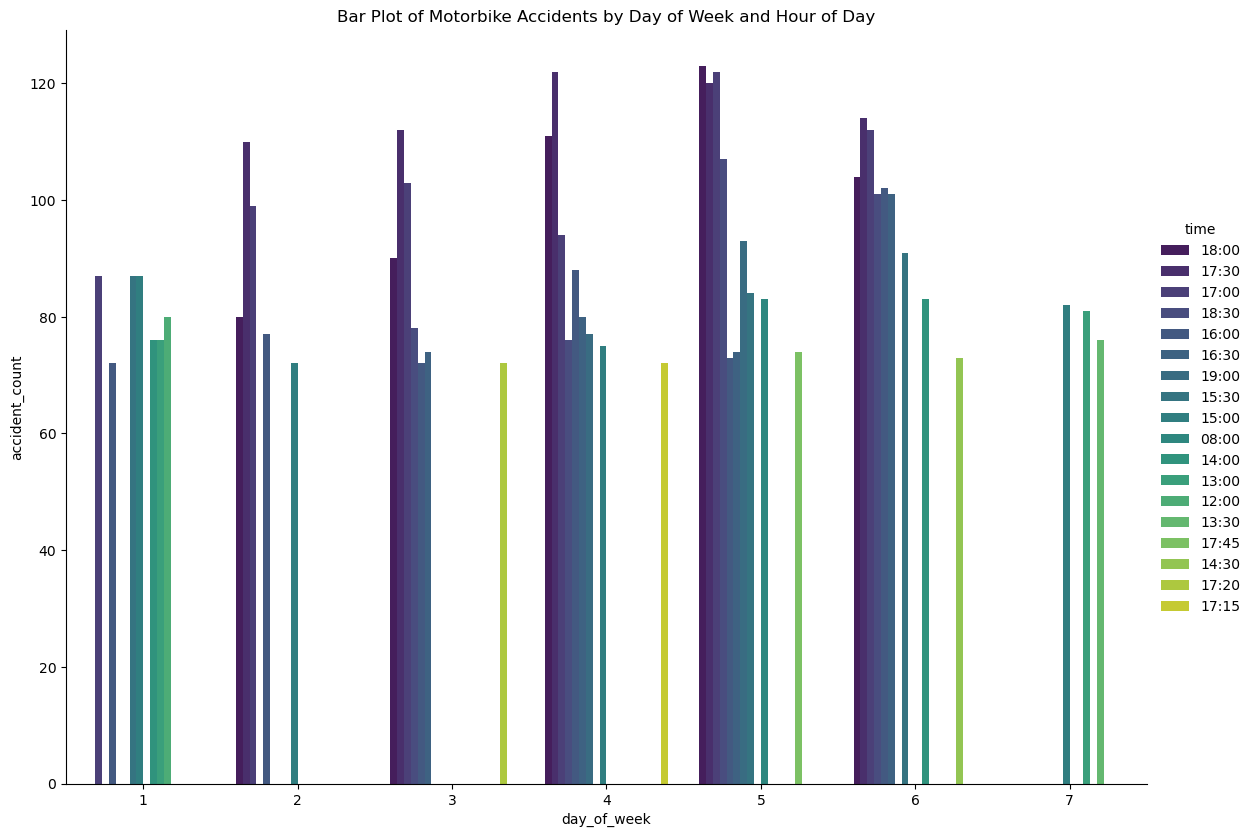

In [7]:
# Visualization for Question 2
plt.figure(figsize=(15,8))
sns.catplot(x='day_of_week', y='accident_count', hue='time', kind='bar', data=data_df_two, palette='viridis', height=8.27, aspect=11.7/8.27)
plt.title('Bar Plot of Motorbike Accidents by Day of Week and Hour of Day')
plt.show()

# For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [8]:
# the below query will count the accident that occured
sql = "SELECT day_of_week, time, COUNT(*) as accident_count \
    FROM accident \
    JOIN casualty ON accident.accident_index = casualty.accident_index \
    WHERE casualty.casualty_type = 0 \
    GROUP BY day_of_week, time \
    ORDER BY accident_count DESC LIMIT 150; "
data_df_three = pd.read_sql_query(sql, connection)
# fetch the first 20 results 
data_df_three.head(20)

,day_of_week,time,accident_count
0,4,15:30,215
1,3,15:30,193
2,5,15:30,188
3,2,15:30,186
4,6,15:30,183
5,4,08:30,164
6,6,16:00,156
7,4,17:00,155
8,3,16:00,154
9,5,08:30,153


# Visualization to support my analysis 
- I will limit my data to 150 to have a clear visualization

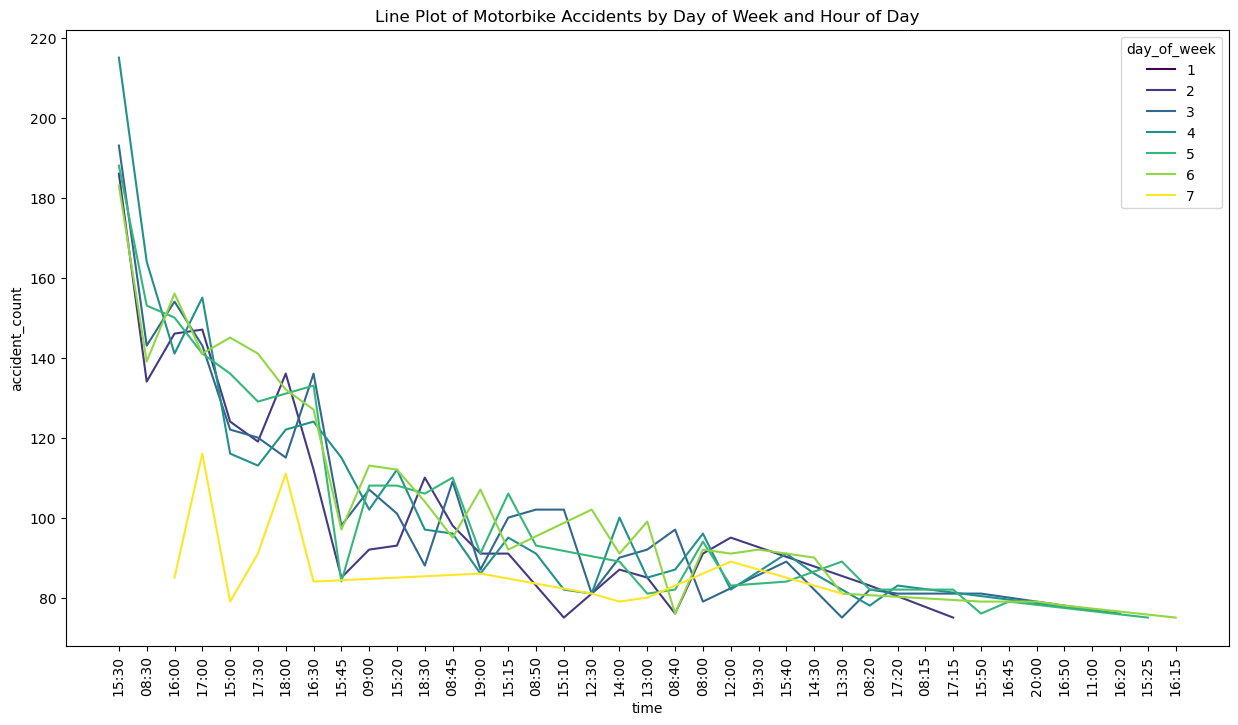

In [10]:
# For line plot
plt.figure(figsize=(15,8))
sns.lineplot(x='time', y='accident_count', hue='day_of_week', data=data_df_three, palette='viridis')
plt.title('Line Plot of Motorbike Accidents by Day of Week and Hour of Day')
plt.xticks(rotation= 90)
plt.show()

# Using the apriori algorithm, explore the impact of selected variables on accident severity.

In [3]:
# import the libraries needed mlxtend and pandas
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import sqlite3

# Database re-connection
db_connection = sqlite3.connect('accident_data_v1.0.0_2023.db')

# SQL query for extracting desired data
sql_query = """
SELECT 
    a.light_conditions, a.weather_conditions, a.road_surface_conditions, 
    a.number_of_vehicles, a.speed_limit, a.urban_or_rural_area, a.accident_severity,
    c.casualty_severity, c.casualty_type, 
    v.vehicle_type, v.vehicle_manoeuvre
FROM 
    accident a
INNER JOIN 
    casualty c ON a.accident_index = c.accident_index
INNER JOIN 
    vehicle v ON a.accident_index = v.accident_index
    
LIMIT 5000;  
"""

# Fetch data from the database into a dataframe
raw_data = pd.read_sql_query(sql_query, db_connection)

# Change datatype to categorical
for column in raw_data.columns:
    raw_data[column] = raw_data[column].astype('category')

# Prepare transactions data
transactions = []
column_names = raw_data.columns.tolist()

for index in range(len(raw_data)):
    current_row = raw_data.iloc[index]
    transaction = [column_names[i] + "_" + str(current_row[i]) for i in range(len(current_row))]
    transactions.append(transaction)

# Transform transactions data into boolean dataframe
transaction_encoder = TransactionEncoder()
boolean_data = transaction_encoder.fit(transactions).transform(transactions)
boolean_df = pd.DataFrame(boolean_data, columns = transaction_encoder.columns_)

# by generate frequent itemsets using apriori
min_support_val = 0.01
frequent_sets = apriori(boolean_df, min_support=min_support_val, use_colnames=True)

# let define association rules
min_threshold_val = 1.0
assoc_rules = association_rules(frequent_sets, metric="lift", min_threshold=min_threshold_val)

# check the rules
print(assoc_rules)

                         antecedents  \
0              (casualty_severity_2)   
1              (accident_severity_2)   
2                  (casualty_type_0)   
3              (accident_severity_2)   
4                  (casualty_type_1)   
...                              ...   
1423721             (vehicle_type_9)   
1423722         (light_conditions_4)   
1423723       (vehicle_manoeuvre_18)   
1423724  (road_surface_conditions_2)   
1423725      (urban_or_rural_area_1)   

                                               consequents  \
0                                    (accident_severity_2)   
1                                    (casualty_severity_2)   
2                                    (accident_severity_2)   
3                                        (casualty_type_0)   
4                                    (accident_severity_2)   
...                                                    ...   
1423721  (accident_severity_3, speed_limit_30, casualty...   
1423722  (accident_seve

In [4]:
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(casualty_severity_2),(accident_severity_2),0.0884,0.1058,0.0872,0.986425,9.323491,0.077847,65.872733,0.979316
1,(accident_severity_2),(casualty_severity_2),0.1058,0.0884,0.0872,0.824197,9.323491,0.077847,5.185338,0.998372
2,(casualty_type_0),(accident_severity_2),0.1424,0.1058,0.0272,0.191011,1.805399,0.012134,1.105331,0.520179
3,(accident_severity_2),(casualty_type_0),0.1058,0.1424,0.0272,0.257089,1.805399,0.012134,1.154378,0.498888
4,(casualty_type_1),(accident_severity_2),0.1112,0.1058,0.0148,0.133094,1.257973,0.003035,1.031484,0.230727
...,...,...,...,...,...,...,...,...,...,...
1423721,(vehicle_type_9),"(accident_severity_3, speed_limit_30, casualty...",0.6408,0.0116,0.0100,0.015605,1.345301,0.002567,1.004069,0.714566
1423722,(light_conditions_4),"(accident_severity_3, speed_limit_30, casualty...",0.4942,0.0160,0.0100,0.020235,1.264670,0.002093,1.004322,0.413760
1423723,(vehicle_manoeuvre_18),"(accident_severity_3, speed_limit_30, casualty...",0.4200,0.0192,0.0100,0.023810,1.240079,0.001936,1.004722,0.333793
1423724,(road_surface_conditions_2),"(accident_severity_3, speed_limit_30, casualty...",0.4350,0.0204,0.0100,0.022989,1.126888,0.001126,1.002649,0.199292


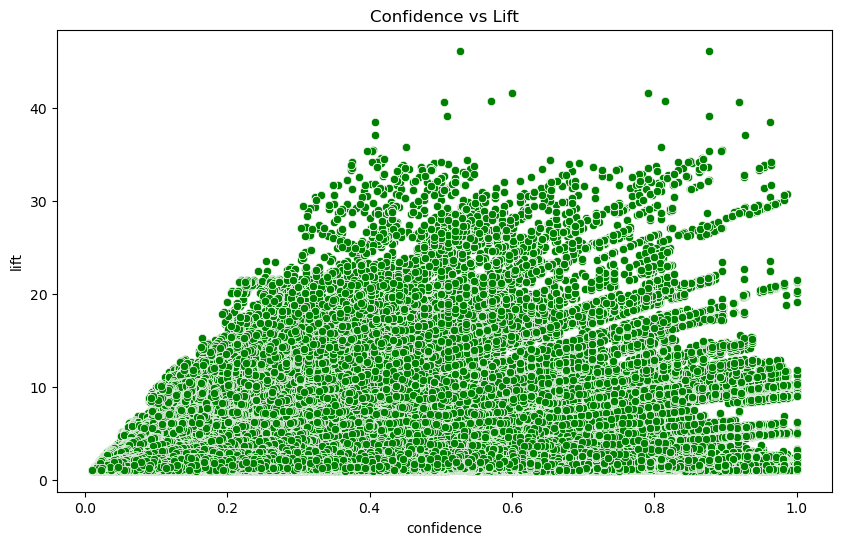

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="confidence", y="lift", data=assoc_rules, c='green')
plt.title("Confidence vs Lift")
plt.show()

In [54]:
df_four.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047107 entries, 0 to 1047106
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype
---  ------                    --------------    -----
 0   accident_severity         1047107 non-null  int64
 1   number_of_vehicles        1047107 non-null  int64
 2   number_of_casualties      1047107 non-null  int64
 3   day_of_week               1047107 non-null  int64
 4   road_type                 1047107 non-null  int64
 5   speed_limit               1047107 non-null  int64
 6   light_conditions          1047107 non-null  int64
 7   weather_conditions        1047107 non-null  int64
 8   road_surface_conditions   1047107 non-null  int64
 9   urban_or_rural_area       1047107 non-null  int64
 10  casualty_severity         1047107 non-null  int64
 11  sex_of_casualty           1047107 non-null  int64
 12  age_band_of_casualty      1047107 non-null  int64
 13  casualty_type             1047107 non-null  int64
 14  ve

# Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Database connection
conn = sqlite3.connect('accident_data_v1.0.0_2023.db')

# SQL query for extracting the data
query = """
SELECT 
    a.longitude, a.latitude, l.lsoa01nm
FROM 
    accident a
JOIN 
    lsoa l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE 
    l.lsoa01nm LIKE 'Kingston upon Hull%' OR 
    l.lsoa01nm LIKE 'Humberside%' OR 
    l.lsoa01nm LIKE 'East Riding of Yorkshire%';
"""

# Fetch data from the database into a dataframe
df = pd.read_sql_query(query, conn)

# Define number of clusters
n_clusters = 3

# Run KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df[['longitude', 'latitude']])

# Add cluster labels to the dataframe
df['cluster'] = kmeans.labels_

In [31]:
df

,longitude,latitude,lsoa01nm,cluster
0,-0.374601,53.758777,Kingston upon Hull 025A,1
1,-0.374468,53.758694,Kingston upon Hull 025A,1
2,-0.374424,53.757876,Kingston upon Hull 025A,1
3,-0.374097,53.756118,Kingston upon Hull 025A,1
4,-0.374005,53.756153,Kingston upon Hull 025A,1
...,...,...,...,...
5319,-0.831629,53.875639,East Riding of Yorkshire 018E,2
5320,-0.828221,53.888198,East Riding of Yorkshire 018E,2
5321,-0.817327,53.928089,East Riding of Yorkshire 018E,2
5322,-0.811857,53.926013,East Riding of Yorkshire 018E,2


# Visualization the clusters

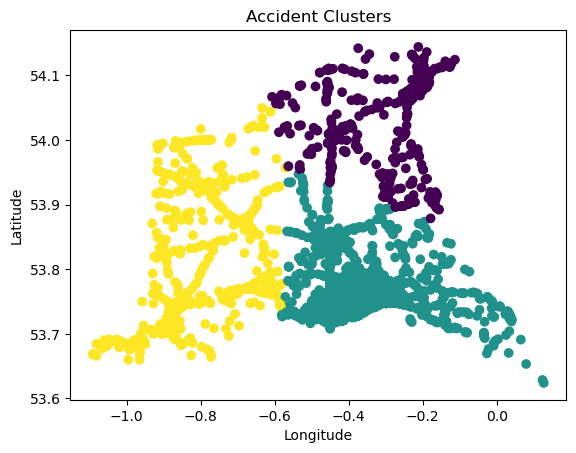

In [11]:
# Plotting the clusters
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'])
plt.title('Accident Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data? 

In [12]:
# Connect to the database
conn = sqlite3.connect('accident_data_v1.0.0_2023.db')

# SQL query for fetching data
query = """
SELECT 
    number_of_vehicles, number_of_casualties
FROM 
    accident;
"""

# Fetch data into a pandas dataframe
df = pd.read_sql_query(query, conn)

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    return outliers

# Detect outliers for 'number_of_vehicles' column
outliers_vehicles = detect_outliers(df, 'number_of_vehicles')
print("Number of outliers detected in 'number_of_vehicles': ", len(outliers_vehicles))

# Detect outliers for 'number_of_casualties' column
outliers_casualties = detect_outliers(df, 'number_of_casualties')
print("Number of outliers detected in 'number_of_casualties': ", len(outliers_casualties))

Number of outliers detected in 'number_of_vehicles':  10748
Number of outliers detected in 'number_of_casualties':  93977


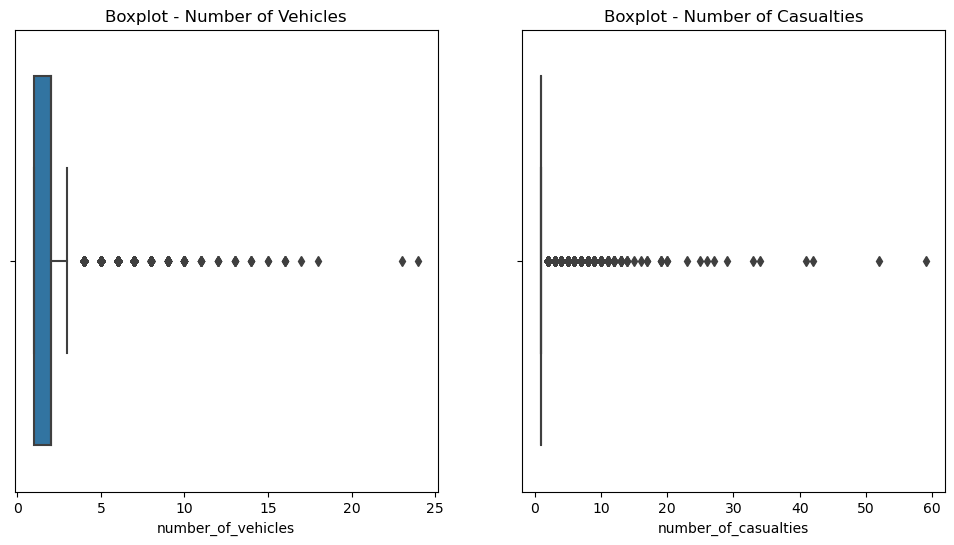

In [13]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.boxplot(x=df['number_of_vehicles'])
plt.title('Boxplot - Number of Vehicles')

plt.subplot(122)
sns.boxplot(x=df['number_of_casualties'])
plt.title('Boxplot - Number of Casualties')

plt.show()

# Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

For the purposes of this exercise, I'll use features such as 'number_of_vehicles', 'number_of_casualties', 'road_type', 'speed_limit', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', and 'casualty_severity' from the 'accident' and 'casualty' tables.

In [14]:
# model to use are Logistic Regression and Random Forest.

Logistic Regression Accuracy: 0.46942694550478914
Random Forest Accuracy: 0.5390472621919192


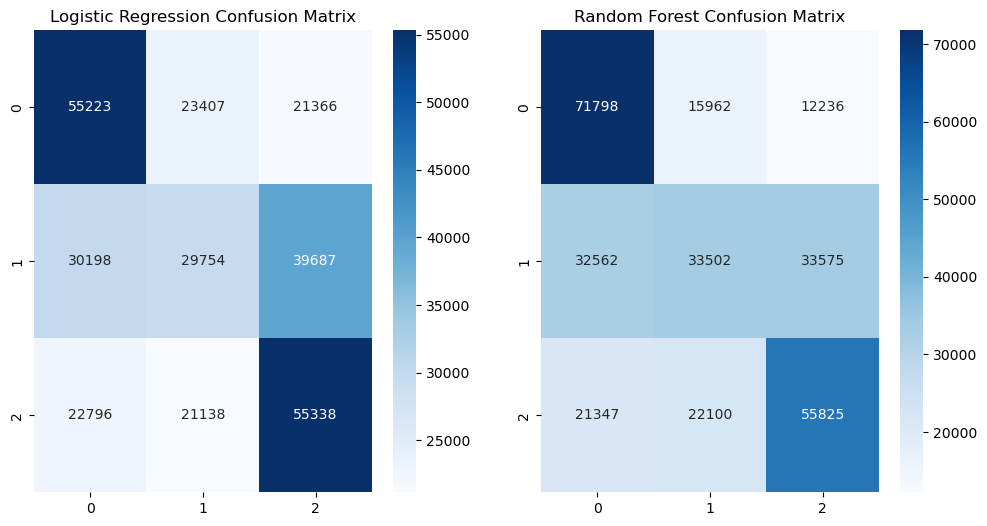

In [16]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


# Connect to the SQLite database
conn = sqlite3.connect('accident_data_v1.0.0_2023.db')

# Fetch data from the database into a Pandas dataframe
query = """
SELECT 
    a.number_of_vehicles, a.number_of_casualties, a.road_type, a.speed_limit, 
    a.light_conditions, a.weather_conditions, a.road_surface_conditions, 
    a.urban_or_rural_area, c.casualty_severity
FROM 
    accident a
JOIN
    casualty c
ON
    a.accident_index = c.accident_index
"""

df = pd.read_sql_query(query, conn)
# Split the data into training and testing sets
X = df.drop('casualty_severity', axis=1)
y = df['casualty_severity']
# Preprocessing
df['casualty_severity'] = df['casualty_severity'].apply(lambda x: 1 if x == 'fatal' else 0)
df = pd.get_dummies(df)

from imblearn.over_sampling import SMOTE

# Balance the data using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Fit models
lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)

# Calculate accuracy scores
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')

# Confusion matrices
lr_cm = confusion_matrix(y_test, lr_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(122)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.show()